# Linear Regression: The Cost of a Security Incident 

This project explains the basic fundamentals of linear regression applied to a simple use case related to Cybersecurity.

The exercise consists of predicting the cost of a security incident based on the number of computers that have been affected. The data set is generated randomly.

### 0. Imports

In [ ]:
# external libraries installation :
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install scikit-learn

### 1. Generation of DataSets

In this case, we have 100 incidents son the longitud is 100 and is going to generate it randomly, we generate just one input variable x that will be corresponded with the number of devices affected and y is the cost of the incidents in this case

In [20]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

print("The dataset longitud is:", len(X))

The dataset longitud is: 100


### 2.Data Visualization of a DataSet

In [23]:
#These are some visualizing functions 
import matplotlib.pyplot as plt
%matplotlib inline

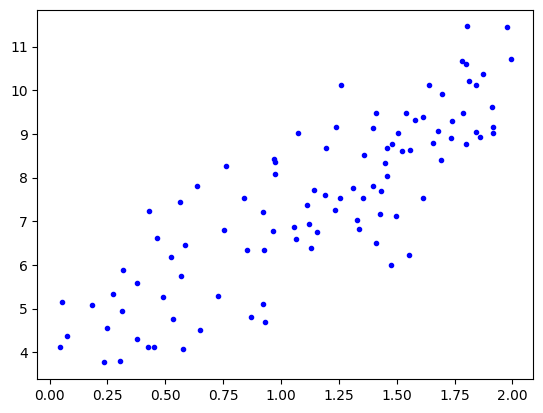

In [25]:
#here we are representing our "x" in the horizontal axis and our "y" in our vertical axis  
plt.plot(X, y, "b.")
plt.show()

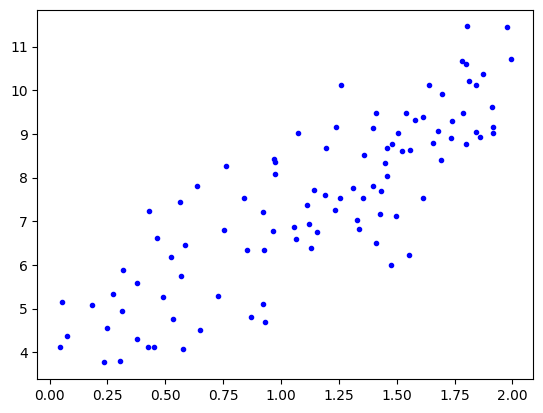

In [26]:
plt.plot(X, y, "b.")
plt.show()

X  is vertical in this case, an

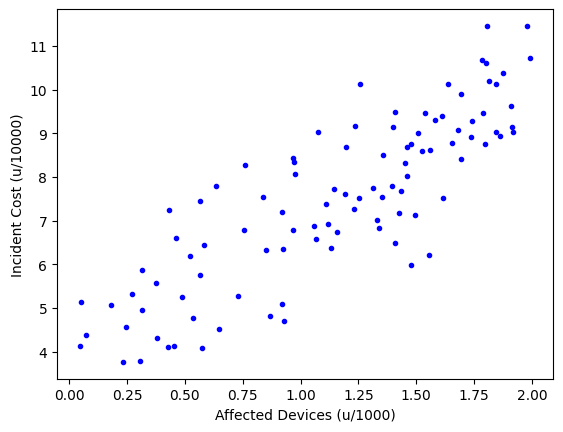

In [27]:
#We tag the axis, x as the affected devices and y as the cost of the incident 
plt.plot(X, y, "b.")
plt.xlabel("Affected Devices (u/1000)")
plt.ylabel("Incident Cost (u/10000)")
plt.show()

### 3. Modification of the DataSet

We are going to instead of representing the conversion value on the axis, we will comvert our data set into their *real value* 

In [28]:
import pandas as pd

In [53]:
#Here we are builing our dataframe with pandas, and convert our dataset into a dictionary. 

data = {'n_affected_devices': X.flatten(), 'cost': y.flatten()}
df = pd.DataFrame(data)

#We show our first 10 row to see our dataframe
df.head(10)

,n_affected_devices,cost
0,1.237300,9.163536
1,0.304588,3.790433
2,0.564392,7.448233
3,1.409388,6.492088
4,1.196198,8.687139
5,0.233633,3.765879
6,1.915438,9.156987
7,1.694797,9.902782
8,1.495640,7.126536
9,1.353289,7.534184


In [54]:
# As we can see above our Dataset still have that convertion factor, they arent scaled, 
# Scaling the number of affected computers
df['n_affected_devices'] = df['n_affected_devices'] * 1000
df['n_affected_devices'] = df['n_affected_devices'].astype('int')
# Scaling the cost to units and currency
df['cost'] = df['cost'] * 10000
df['cost'] = df['cost'].astype('int')
df.head(10)

,n_affected_devices,cost
0,1237,91635
1,304,37904
2,564,74482
3,1409,64920
4,1196,86871
5,233,37658
6,1915,91569
7,1694,99027
8,1495,71265
9,1353,75341


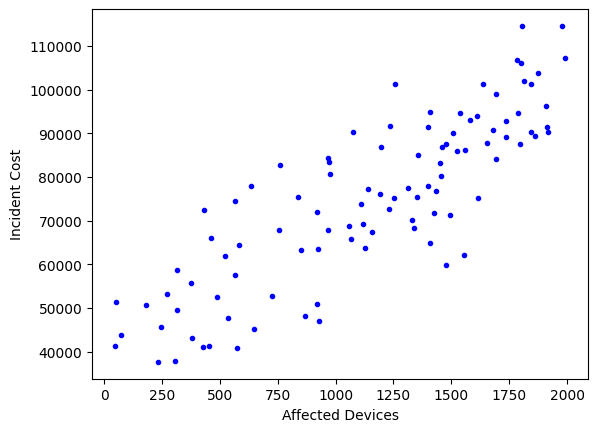

In [55]:
# Graphic Representation of a DataSet 
plt.plot(df['n_affected_devices'], df['cost'], "b.")
plt.xlabel("Affected Devices")
plt.ylabel("Incident Cost")
plt.show()

### 4. Building our model 

In [56]:
from sklearn.linear_model import LinearRegression

In [65]:
# Construction of the model and adjustment of the hypothesis function, 
lin_reg = LinearRegression()
#this function Fit is for training purposes, we use the input variable in this case affected devices, and also the output variable and continuous variable 
lin_reg.fit(df['n_affected_devices'].values.reshape(-1, 1), df['cost'].values)

LinearRegression()

In [79]:
# Parameter theta 0
lin_reg.intercept_

40357.202732402344

In [80]:
# Parameter theta 1
lin_reg.coef_

array([30.08266188])

In [81]:
#Prediction of the minimal value and maximum value of the training dataset
X_min_max = np.array([[df["n_affected_devices"].min()], [df["n_affected_devices"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

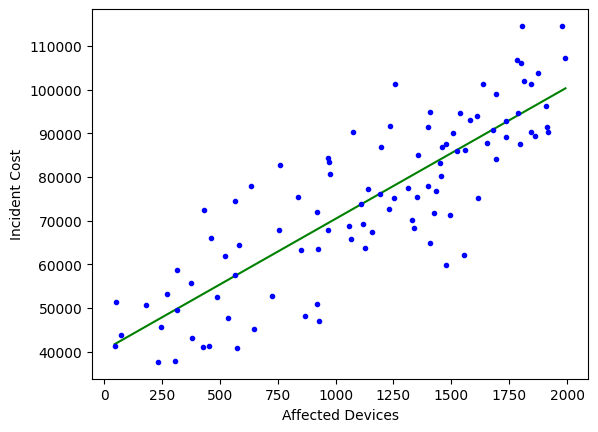

In [82]:

#Graphical Representation of the hipothesis function generated 
#the green line is the (f) of the hipothesis, in this case its adapted pretty good to our training data

plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_affected_devices'], df['cost'], "b.")
plt.xlabel("Affected Devices")
plt.ylabel("Incident Cost")
plt.show()

### 5. Predictions with new examples of inputs

In [94]:
x_new = np.array([[1300]]) # 1300 means i will predict the cost for that Qty of devices

# This is the prediction of the cost with that incident 
coste = lin_reg.predict(x_new) 

print("The cost of the incident will be :", int(coste[0]), "USD")

The cost of the incident will be : 79464 USD


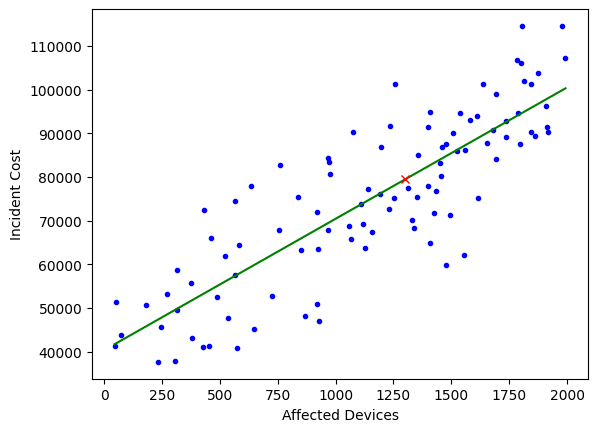

In [95]:
plt.plot(df['n_affected_devices'], df['cost'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Affected Devices")
plt.ylabel("Incident Cost")
plt.show()